# Image Data Augmentation with Keras

![Horizontal Flip](https://drive.google.com/uc?export=view&id=1O-WN_pNt9J4nx-9iPR1d28dw_4TTiCCr)

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/image-data-augmentation-keras')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Import Libraries

In [2]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.3.0


### Rotation

In [3]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40
)

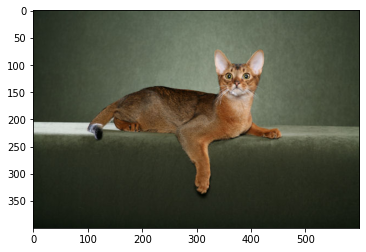

In [4]:
image_path = 'images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


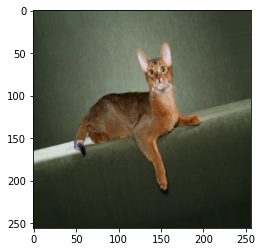

In [5]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

### Width and Height Shifts

In [6]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=[-40, -20, 0, 20, 40],
    height_shift_range=[-50,50]
)

Found 1 images belonging to 1 classes.


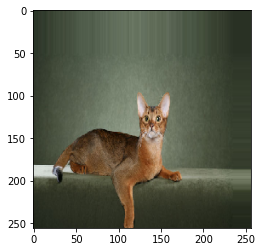

In [7]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

### Brightness

Found 1 images belonging to 1 classes.


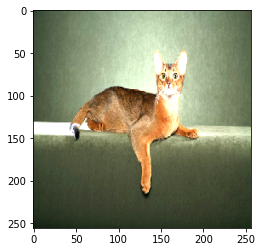

In [8]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=(0., 2.)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

### Shear Transformation

Found 1 images belonging to 1 classes.


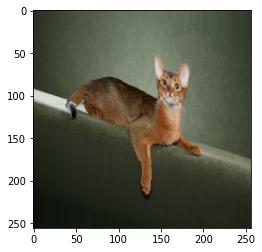

In [9]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=45
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

### Zoom

Found 1 images belonging to 1 classes.


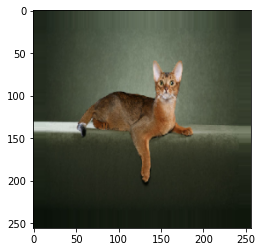

In [10]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.5
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

### Channel Shift

Found 1 images belonging to 1 classes.


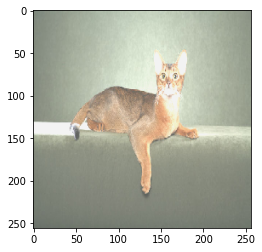

In [11]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range=100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

### Flips

Found 1 images belonging to 1 classes.


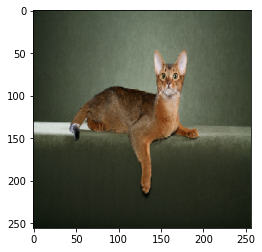

In [12]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Task 9: Normalization

### Featurewise

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True
)

generator.fit(x_train)

170500096/170498071 [==============================] - 4s 0us/step


In [16]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

0.073919654 1.0001613 [[0]]
120.70756512369792


### Samplewise

In [17]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

-1.390775e-07 1.0 [[0]]


### Rescale and Preprocessing Function

In [18]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rescale=1.
)

In [19]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [20]:
print(x.mean(), x.std(), y)

-0.18479879 0.28322548 [[4]]
